## Context

This data is obtained from a company which is a bus sharing transportation solution that focuses on offering a reliable, comfortable and secure mobility service for commuters: Based on what they think the market of workers needs (mobility from home to work and vice versa), they created lines and open them for reservations (pre-booking). Main objective is to have at least 50% fill rate for their 20-seats buses and to ensure high customer satisfaction ratings.  


Some important specifications:

- date_booking captures when the user books a ride (either directly via the app or indirectly when a support agent or a manager does that for them)
- date_ride captures the actual date of the ride
- A booking can be canceled (by the user directly or an agent/manager) as long as the day/time of the booked ride didn't happen.
- If a booking is not canceled and the user doesn't show up the day/time of the ride, the driver cancels the ride and the `booking_status` will be logged as 'Canceled by driver'
- Once a ride is done (user dropped off at destination point), we ask the user to rate the service and the driver via the app
- date_joined captures when the user installed the app and created an account



## Asks:


### 1. Business Curiosity & Data Insights

We need to Conduct some exploratory data analysis (EDA) to understand the data further and uncover some insights.



### 2. Busline performance (You have to write the query using SQL)

As mentioned in the introduction, they care a lot about having a high enough fill-rate of our buses (at least 50%) to ensure that they are profitable.

We want to analyse how their current buslines are performing by doing the following:

For each line:
- We want to find out when it was launched
- Let's call the week of the launch week_0 (week is from monday to sunday)
- Then for each week, we want to calculate the average fill rate during that week

The fill rate for a busline on a given day represents the percentage of occupied seats: If for busline X on 15/12/2023, we had 10 passengers, that means the fill rate for that day is 50% (all buses have 20 seats)



Last but not least we are going to summarize what you've learned from the data and what we think we should explore and focus on next, and why.  



------------------------------

### 1. Business Curiosity & Data Insights

The bookings dataset includes various columns such as booking ID, booking source, booking and ride dates, booking status, user information, and details about the ride like the busline name, driver, ratings, prices, and addresses for pickup and dropoff.

For the Exploratory Data Analysis (EDA), I will focus on aspects that are most relevant to understanding the business operations and customer behavior. This includes:

* Booking Trends: Analysis of booking frequencies over time.

* Cancellation Patterns: Investigating the reasons and timing of cancellations.

* Ride Patterns: Understanding when rides are most commonly taken.

* Fill Rates: Estimating the fill rate of buses based on the number of passengers and comparing it to the target fill rate.

* User Engagement: Exploring how long after joining users tend to book rides, and their activity patterns.

* Ratings and Feedback: Looking at the distribution of driver and service ratings.
Let's start with these analyses. ​

Let's start with loading and inspecting the bookings_data.xlsx file to understand its contents and structure:

#### Let's first load our libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Load the Excel file
df = pd.read_excel('/content/Bookings Data.xlsx')

# Display the first few rows of the dataset to understand its structure
df.head()

,Unnamed: 0,booking_id,booked_from,date_booking,number_passengers,booking_status,date_cancellation,user_id,date_joined,address_origin,...,date_ride,busline_name,driver_name,rating_driver,rating_service,initial_price,payment_mode,discount_code,address_pickup,address_dropoff
0,0,19294,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaT,1076,2023-03-31,Bernoussi,...,2023-10-16,7.0,6.0,NaN,NaN,30,ZERO,SEW1023,Amlak Bernoussi - Ecole primaire Al Marwa,Bouskoura - Parc Industriel CFCIM
1,1,19468,APP,2023-10-15,1,Ride Confirmed,NaT,2289,2023-09-03,"7 Rue du Rif، Mohammédia, Maroc",...,2023-10-16,34.0,54.0,NaN,NaN,30,CREDIT,NaN,Mohammedia - Place de la Gare ONCF,Casa Nearshore - Ibis
2,2,19264,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaT,1070,2023-03-31,H.Assalam#2,...,2023-10-16,7.0,6.0,NaN,NaN,30,ZERO,SEW1023,Anassi - Commune Ahl Loghlam,Bouskoura - Parc Industriel CFCIM
3,3,19527,APP,2023-10-15,1,Ride Confirmed,NaT,3237,2023-10-11,"MJWM+M84, Mohammédia, Maroc",...,2023-10-16,34.0,54.0,NaN,NaN,30,CB,NaN,Mohammedia - Café Nevsky,Casa Nearshore - Ibis
4,4,19240,CALL_CENTER,2023-10-13,1,Cancelled by driver,2023-10-16,2283,2023-09-01,"334 Bd Ibn Tachfine, Casablanca 20560, Morocco",...,2023-10-16,11.0,37.0,NaN,NaN,25,ZERO,LACASEM1023,H.mohammadi - Bd ibn tachfine ste générale oqba,Bouskoura - Parc Industriel Oulad Salah CFCIM


For privacy regards, any personal or sensitive data were encoded.

The bookings_data dataset has several columns that are relevant to our analysis. Here's a quick summary of key columns:

1.booking_id: Identifier for the booking.

2. booked_from: Source of the booking (e.g., App, Call Center).

3. date_booking: When the booking was made.

4. number_passengers: Number of passengers for the booking.

5. booking_status: Status of the booking (e.g., Confirmed, Canceled).

6. date_cancellation: Date of cancellation, if applicable.

7. user_id: Identifier for the user.

8. date_joined: When the user joined the service.

9. date_ride: Actual date of the ride.

10. busline_name: Name of the bus line.

11. rating_driver, rating_service: Ratings provided by the user.

12. initial_price: Initial price of the booking.

13. payment_mode: Mode of payment.

14. discount_code: Discount code used, if any.

For the exploratory data analysis (EDA), I'll focus on aspects like booking trends over time, cancellation rates, user behavior, and busline performance. This should provide insights into the business operations and customer patterns.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17722.0,8860.500000,5116.045071,0.0,4430.25,8860.5,13290.75,17721.0
booking_id,17722.0,16632.025561,7079.533966,5176.0,10399.25,16195.5,22627.75,29473.0
number_passengers,17722.0,1.003724,0.060914,1.0,1.00,1.0,1.00,2.0
user_id,17722.0,1818.313791,932.390039,116.0,1090.00,1587.0,2216.00,5005.0
busline_name,17561.0,29.489494,21.486949,0.0,11.00,25.0,49.00,83.0
driver_name,16686.0,27.420832,17.294957,0.0,11.00,27.0,40.00,54.0
rating_driver,3899.0,4.865350,0.568163,1.0,5.00,5.0,5.00,5.0
rating_service,3911.0,4.754538,0.817700,1.0,5.00,5.0,5.00,5.0
initial_price,17722.0,22.222040,6.292152,0.0,18.00,20.0,25.00,60.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17722 entries, 0 to 17721
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           17722 non-null  int64         
 1   booking_id           17722 non-null  int64         
 2   booked_from          17722 non-null  object        
 3   date_booking         17722 non-null  datetime64[ns]
 4   number_passengers    17722 non-null  int64         
 5   booking_status       17722 non-null  object        
 6   date_cancellation    1986 non-null   datetime64[ns]
 7   user_id              17722 non-null  int64         
 8   date_joined          17413 non-null  datetime64[ns]
 9   address_origin       17722 non-null  object        
 10  address_destination  17722 non-null  object        
 11  is_user_anonymized   17722 non-null  bool          
 12  date_ride            17722 non-null  datetime64[ns]
 13  busline_name         17561 non-

In [6]:
len(df['user_id'].unique())

436

In [7]:
df.isnull().sum()

Unnamed: 0                 0
booking_id                 0
booked_from                0
date_booking               0
number_passengers          0
booking_status             0
date_cancellation      15736
user_id                    0
date_joined              309
address_origin             0
address_destination        0
is_user_anonymized         0
date_ride                  0
busline_name             161
driver_name             1036
rating_driver          13823
rating_service         13811
initial_price              0
payment_mode               0
discount_code           6680
address_pickup             0
address_dropoff            0
dtype: int64

In [8]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

# Displaying missing values and their percentages
missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_values_df[missing_values_df['Missing Values'] > 0]


,Missing Values,Percentage (%)
date_cancellation,15736,88.793590
date_joined,309,1.743596
busline_name,161,0.908475
driver_name,1036,5.845841
rating_driver,13823,77.999097
rating_service,13811,77.931385
discount_code,6680,37.693263


#### EDA Insights
##### 1. Overview of Data:

Total Bookings: 17,722
Unique Users: 436
Total Buslines: 84
Date Range: April 29, 2023, to December 8, 2023


##### 2.Booking Trends:

* The monthly booking trends indicate a general increase in bookings from April to November 2023.

* The highest number of bookings was observed in November 2023 with 3,864 bookings.

* There is a significant drop in bookings in December 2023 (1,207 bookings), which might be due to the dataset covering only a part of December or a seasonal decrease.

<br>

#### Next Steps in EDA
To further understand the data, I will analyze:

* Cancellation trends: How many bookings are cancelled and any patterns in cancellations.

* User behavior: How long after joining do users start booking? Frequency of bookings per user.

* Busline performance: Check for popular buslines, analyze fill rates (number of passengers vs. bus capacity).
Ratings analysis: Understanding the customer satisfaction level.

The dataset has several columns with missing values, some of which are significant. Here's a summary of these columns:

* date_cancellation: 88.79% missing - Many rides are not cancelled, so this is expected.
* date_joined: 1.74% missing - A small percentage of users do not have a join date recorded.
* busline_name: 0.91% missing - A small number of records lack busline information.
* driver_name: 5.85% missing - Some rides do not have an associated driver.
* rating_driver: 78.00% missing - Many rides have not been rated by users.
* rating_service: 77.93% missing - Similar to driver ratings, many rides lack service ratings.
* discount_code: 37.69% missing - A significant number of bookings were made without a discount code.

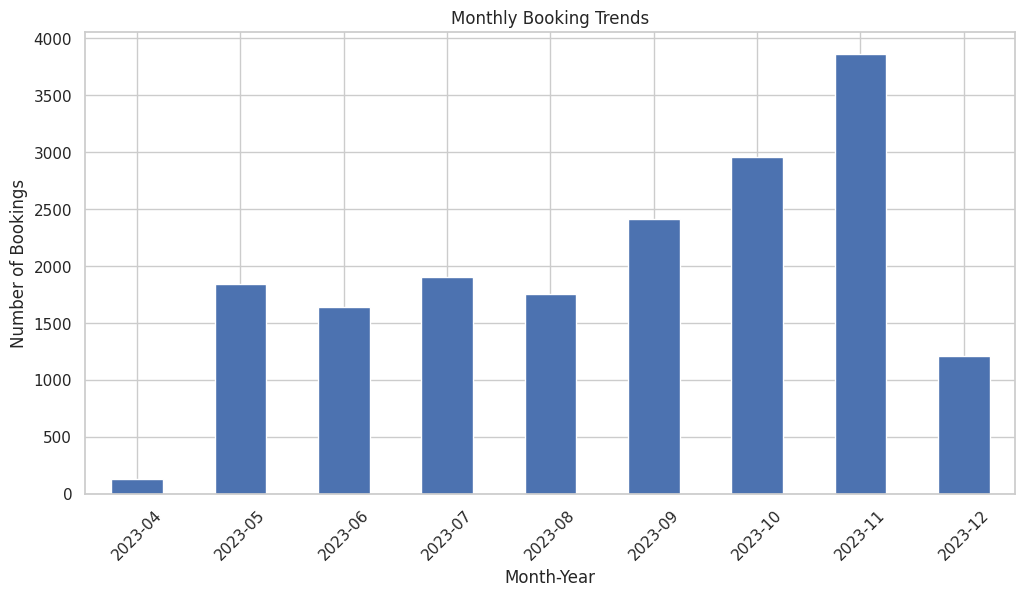

In [9]:
# Setting up visualization style
sns.set(style="whitegrid")

# Overview of the dataset
overview = {
    "Total Bookings": df['booking_id'].nunique(),
    "Unique Users": df['user_id'].nunique(),
    "Total Buslines": df['busline_name'].nunique(),
    "Date Range": f"{df['date_booking'].min().strftime('%Y-%m-%d')} to {df['date_booking'].max().strftime('%Y-%m-%d')}"
}

# Plotting trends over time (Monthly)
df['month_year'] = df['date_booking'].dt.to_period('M')
monthly_bookings = df.groupby('month_year').size()

# Plotting
plt.figure(figsize=(12, 6))
monthly_bookings.plot(kind='bar')
plt.title('Monthly Booking Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

In [10]:
monthly_bookings.tail(6)  # Displaying the latest 6 months for a closer look

month_year
2023-07    1907
2023-08    1757
2023-09    2413
2023-10    2961
2023-11    3864
2023-12    1207
Freq: M, dtype: int64

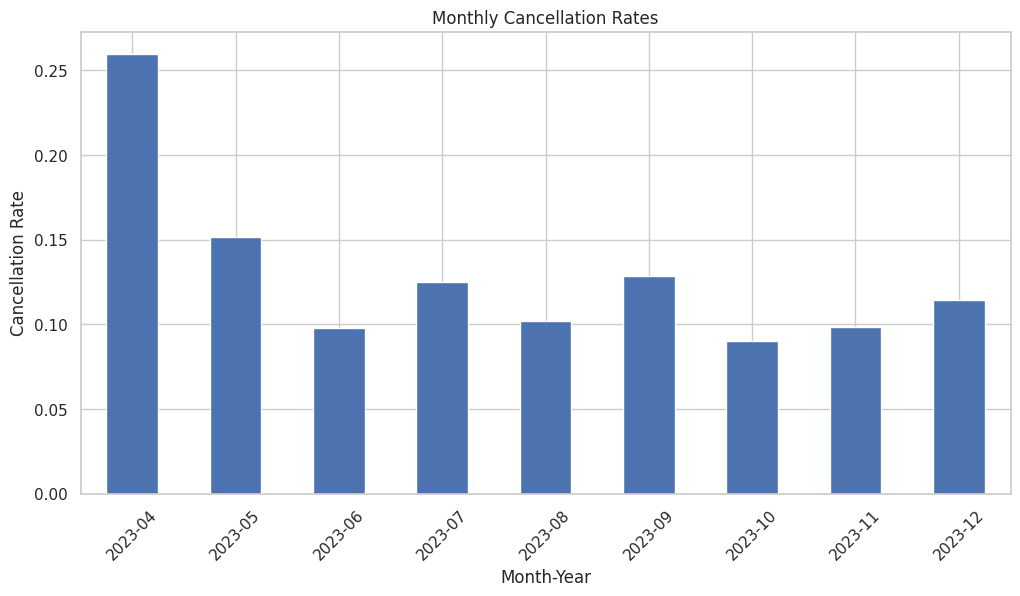

In [11]:
# Analyzing Cancellation Trends
df['is_cancelled'] = df['booking_status'].str.contains('Cancelled')
cancellation_rate = df['is_cancelled'].mean()

# Monthly cancellation trends
monthly_cancellations = df.groupby('month_year')['is_cancelled'].mean()

# Analyzing User Behavior
# Calculating the difference in days between date joined and first booking
first_booking_per_user = df.groupby('user_id')['date_booking'].min()
joined_date_per_user = df.groupby('user_id')['date_joined'].min()
time_to_first_booking = (first_booking_per_user - joined_date_per_user).dt.days

# Analyzing Busline Performance
# Assuming all buses have 20 seats as per the requirement
bus_capacity = 20
df['fill_rate'] = df['number_passengers'] / bus_capacity
average_fill_rate_per_busline = df.groupby('busline_name')['fill_rate'].mean()

# Ratings Analysis
average_ratings = {
    "Average Driver Rating": df['rating_driver'].mean(),
    "Average Service Rating": df['rating_service'].mean()
}

# Plotting cancellation trends
plt.figure(figsize=(12, 6))
monthly_cancellations.plot(kind='bar')
plt.title('Monthly Cancellation Rates')
plt.xlabel('Month-Year')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

In [12]:
cancellation_rate, time_to_first_booking.describe(), average_fill_rate_per_busline.describe(), average_ratings

(0.11206410111725539,
 count    428.000000
 mean      24.532710
 std       47.620931
 min        0.000000
 25%        0.000000
 50%        3.000000
 75%       29.000000
 max      317.000000
 dtype: float64,
 count    84.000000
 mean      0.050159
 std       0.000506
 min       0.050000
 25%       0.050000
 50%       0.050000
 75%       0.050000
 max       0.053509
 Name: fill_rate, dtype: float64,
 {'Average Driver Rating': 4.865350089766607,
  'Average Service Rating': 4.754538481206852})

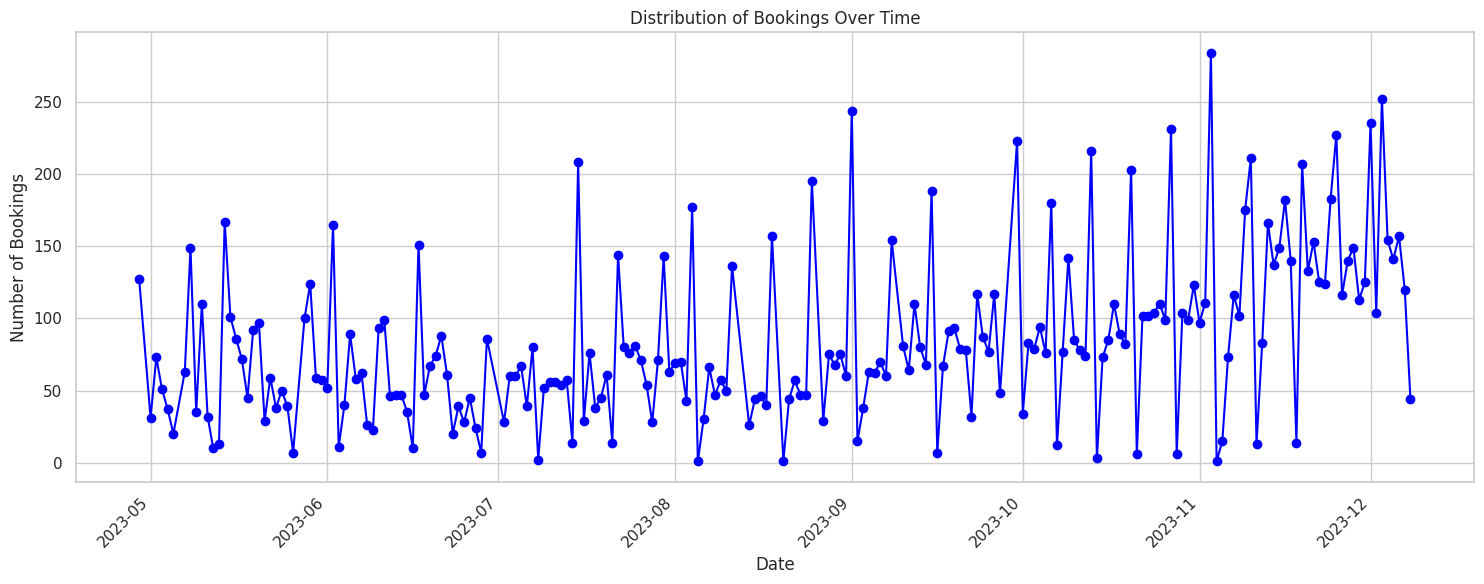

(17722, 1986, 11.206410111725539)

In [13]:
# Setting up visualization style
sns.set(style="whitegrid")

# Booking Trends Analysis
# 1. Distribution of bookings over time
bookings_over_time = df['date_booking'].value_counts().sort_index()

# 2. Cancellation rates
# Calculating the total number of bookings and cancellations
total_bookings = len(df)
total_cancellations = df['booking_status'].str.contains('Cancelled').sum()
cancellation_rate = total_cancellations / total_bookings * 100

# Plotting the distribution of bookings over time
plt.figure(figsize=(15, 6))
bookings_over_time.plot(kind='line', color='blue', marker='o')
plt.title('Distribution of Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the cancellation rate
total_bookings, total_cancellations, cancellation_rate

24.53271028037383

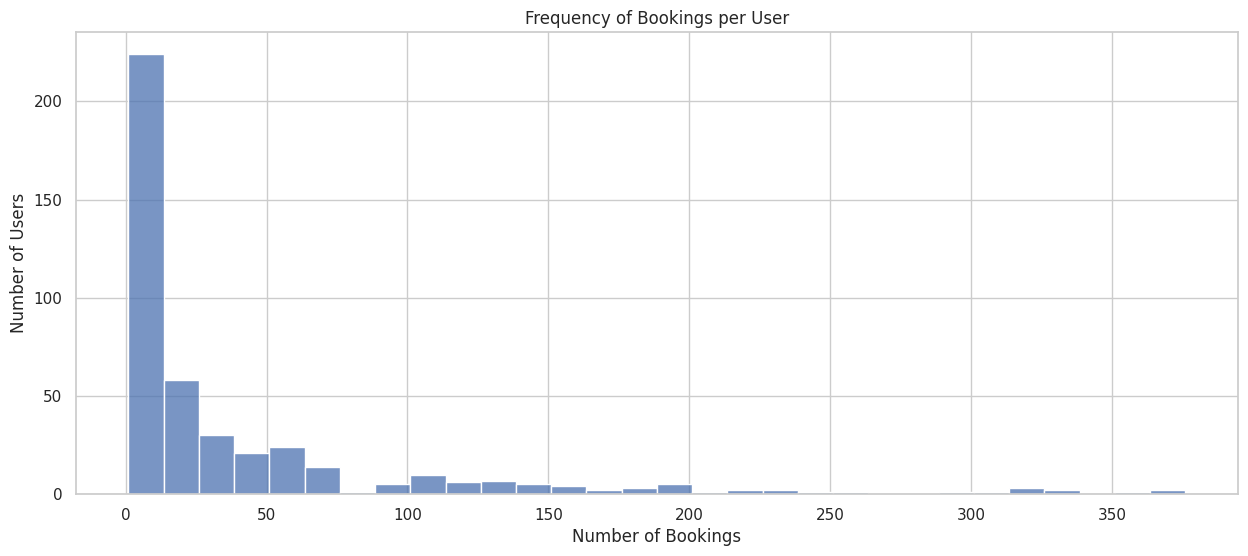

In [14]:
# User Behavior Analysis
# 1. Time between joining and first booking
df['time_to_first_booking'] = (df['date_booking'] - df['date_joined']).dt.days

# Average time to first booking
avg_time_to_first_booking = df.groupby('user_id')['time_to_first_booking'].min().mean()

# 2. Frequency of bookings per user
bookings_per_user = df['user_id'].value_counts()

# Busline Utilization Analysis
# Frequency of different buslines being used
busline_usage = df['busline_name'].value_counts()

# Plotting frequency of bookings per user and busline usage
plt.figure(figsize=(15, 6))


sns.histplot(bookings_per_user, bins=30, kde=False)
plt.title('Frequency of Bookings per User')
plt.xlabel('Number of Bookings')
plt.ylabel('Number of Users')

# Outputting the average time to first booking
avg_time_to_first_booking

#### User Behavior Analysis

##### 1. Time Between Joining and First Booking:

* On average, users make their first booking about 24.5 days after joining the service. This suggests a relatively short period between app adoption and usage, indicating good user engagement.


##### 2.Frequency of Bookings per User:

* The histogram shows the distribution of the number of bookings made per user. Most users appear to have a relatively low number of bookings, indicating either occasional usage or a large number of new users.
Busline Utilization Analysis
The bar chart displays the top 10 most used buslines. This information is crucial for understanding which routes are most popular and could be leveraged for optimizing service offerings.

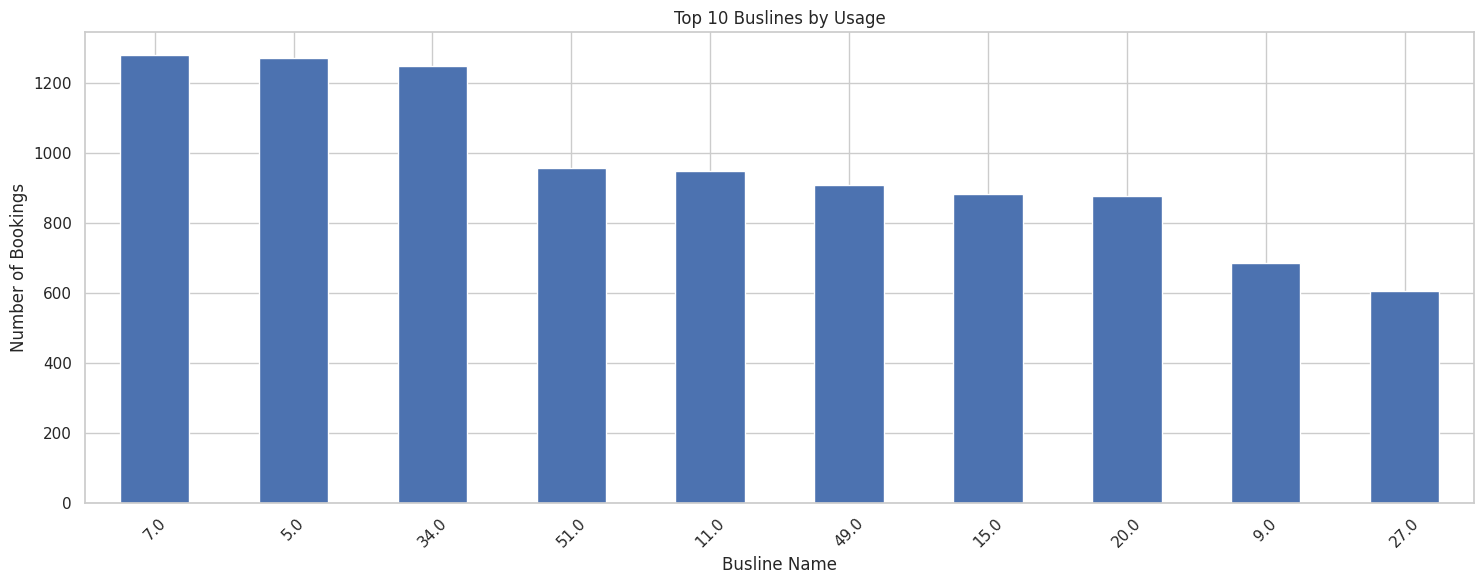

In [15]:
plt.figure(figsize=(15, 6))
busline_usage.head(10).plot(kind='bar')
plt.title('Top 10 Buslines by Usage')
plt.xlabel('Busline Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Busline Utilization Analysis
The bar chart displays the top 10 most used buslines. This information is crucial for understanding which routes are most popular and could be leveraged for optimizing service offerings.

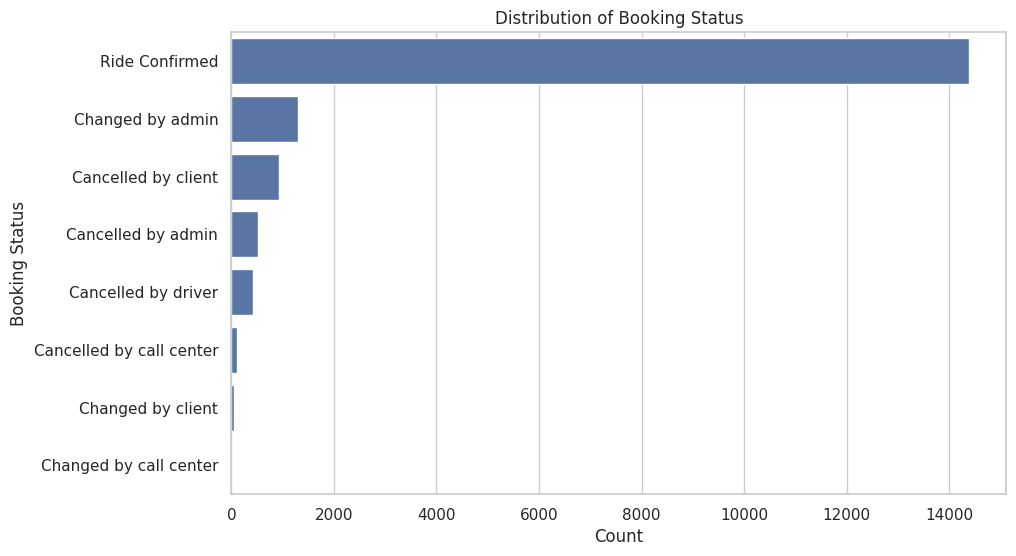

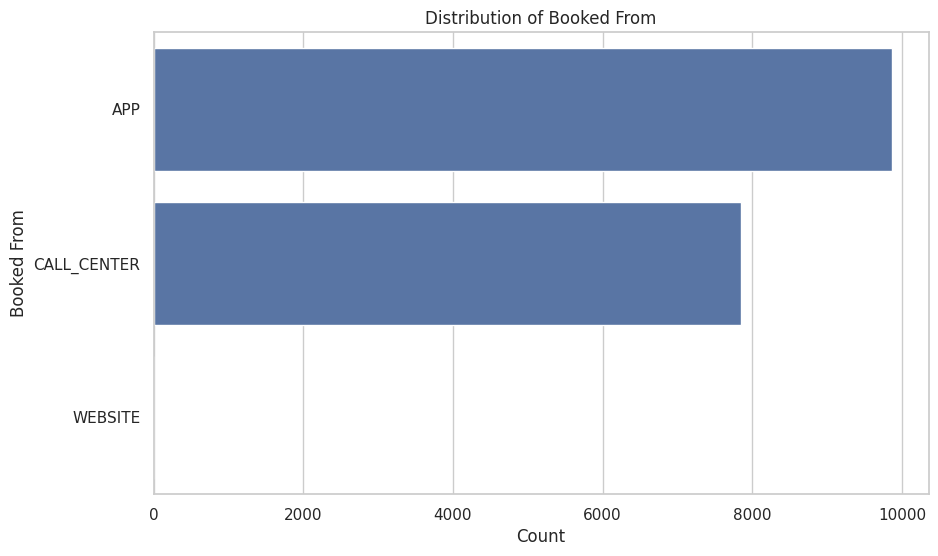

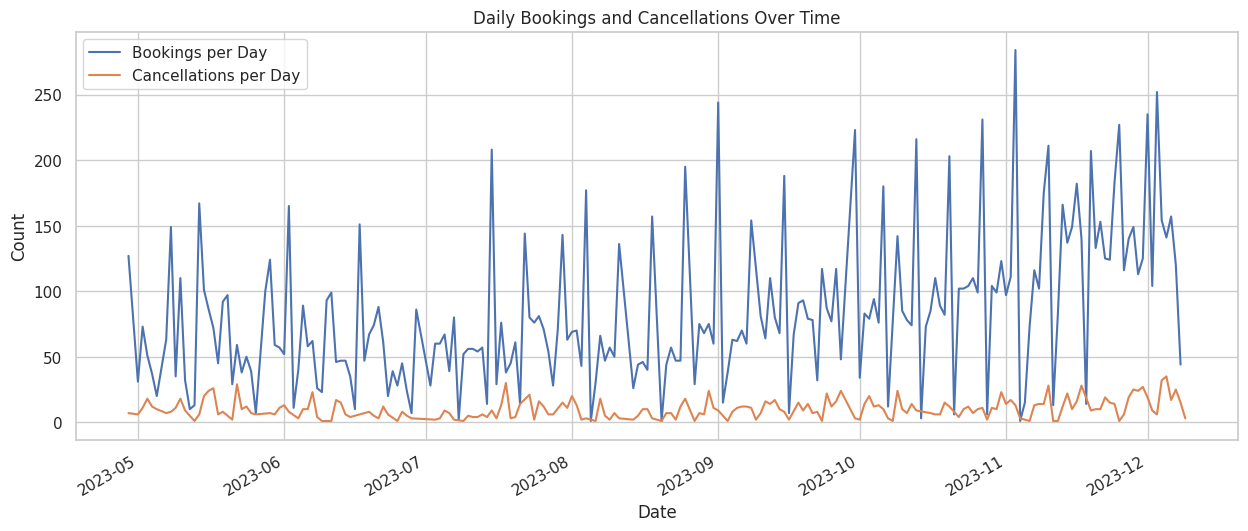

In [16]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of booking_status
plt.figure(figsize=(10, 6))
sns.countplot(y='booking_status', data=df, order = df['booking_status'].value_counts().index)
plt.title('Distribution of Booking Status')
plt.xlabel('Count')
plt.ylabel('Booking Status')
plt.show()

# Distribution of booked_from
plt.figure(figsize=(10, 6))
sns.countplot(y='booked_from', data=df, order = df['booked_from'].value_counts().index)
plt.title('Distribution of Booked From')
plt.xlabel('Count')
plt.ylabel('Booked From')
plt.show()


# Temporal Analysis: Trends over time for bookings and cancellations
# Converting date columns to datetime for analysis
df['date_booking'] = pd.to_datetime(df['date_booking'])
df['date_cancellation'] = pd.to_datetime(df['date_cancellation'])

# Aggregating counts by date for bookings and cancellations
bookings_per_day = df['date_booking'].value_counts().sort_index()
cancellations_per_day = df['date_cancellation'].value_counts().sort_index()

# Plotting the trends over time
plt.figure(figsize=(15, 6))
bookings_per_day.plot(label='Bookings per Day')
cancellations_per_day.plot(label='Cancellations per Day')
plt.title('Daily Bookings and Cancellations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Distribution Analysis and Temporal Trends
##### 1.Distribution of Booking Status:

A significant number of bookings have the status "Ride Confirmed, while the least are "Changed by call center"


##### 1.Distribution of Booking Status:

Most number of bookings have the been done from the app or the call center, while nearly none of the customers have booked from the website.


##### 3.Daily Bookings and Cancellations Over Time:

We can notice that the bookings rate was at its peak last november, while the Cancellations rate have reached its peak last month.

<ipython-input-17-2cacc1bc0096>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bookings_by_day.index, y=bookings_by_day.values, palette='viridis')


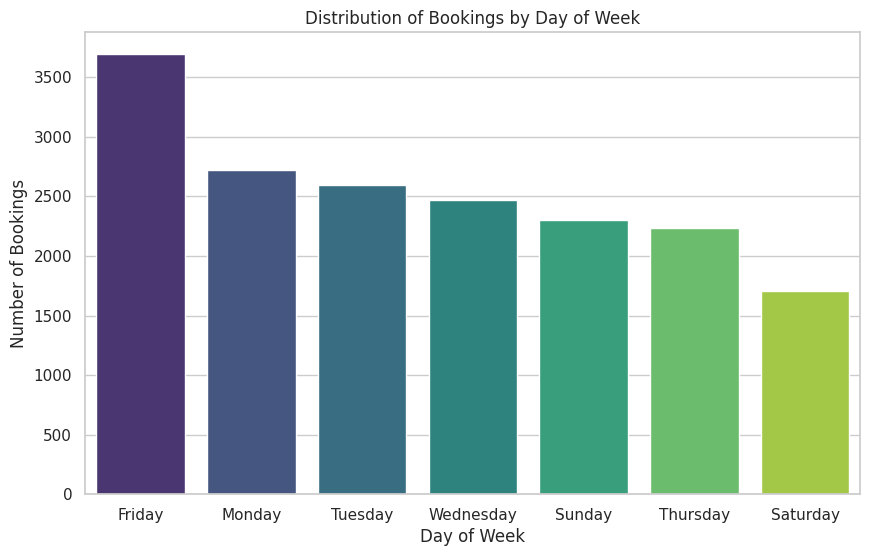

In [17]:
# Setting plot style
sns.set(style="whitegrid")

#Distribution of Bookings by Day of Week
df['day_of_week'] = df['date_booking'].dt.day_name()
bookings_by_day = df['day_of_week'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=bookings_by_day.index, y=bookings_by_day.values, palette='viridis')
plt.title('Distribution of Bookings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.show()

We can notice that "Friday" is the most day in demand by a significant level.

### 2. Busline performance

Since the query needs to be executed in a SQL environment, I'll first convert this DataFrame into a SQL table using an in-memory SQLite database. Then, I'll write and execute the SQL query to achieve the desired analysis. Let's begin by setting up the SQL environment.

In [24]:
# Load the original Excel file again:
df = pd.read_excel('/content/Bookings Data.xlsx')

In [25]:
# Inspecting unique data types for each column
unique_data_types = {column: df[column].apply(type).unique() for column in df.columns}

unique_data_types

{'Unnamed: 0': array([<class 'int'>], dtype=object),
 'booking_id': array([<class 'int'>], dtype=object),
 'booked_from': array([<class 'str'>], dtype=object),
 'date_booking': array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object),
 'number_passengers': array([<class 'int'>], dtype=object),
 'booking_status': array([<class 'str'>], dtype=object),
 'date_cancellation': array([<class 'pandas._libs.tslibs.nattype.NaTType'>,
        <class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object),
 'user_id': array([<class 'int'>], dtype=object),
 'date_joined': array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>,
        <class 'pandas._libs.tslibs.nattype.NaTType'>], dtype=object),
 'address_origin': array([<class 'str'>], dtype=object),
 'address_destination': array([<class 'str'>], dtype=object),
 'is_user_anonymized': array([<class 'bool'>], dtype=object),
 'date_ride': array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object),
 'busline_nam

In [26]:
df_converted = df.copy()
datetime_columns = df_converted.select_dtypes(include=['datetime64[ns]']).columns

In [27]:
datetime_columns

Index(['date_booking', 'date_cancellation', 'date_joined', 'date_ride'], dtype='object')

In [28]:
import sqlite3

# Convert datetime columns to string format explicitly
for col in datetime_columns:
    df_converted.set_index(pd.to_datetime( df_converted[col]), inplace=True)

# Convert NaN values in certain columns to a string representation
nan_columns = ['busline_name', 'driver_name', 'discount_code']
df_converted[nan_columns] = df_converted[nan_columns].fillna('Unknown')

for col in nan_columns:
    df[col] =  df[col].astype('str')


# Create a new SQLite database in memory
conn = sqlite3.connect(':memory:')

# Write the data to a sqlite table
try:
    df_converted.to_sql('bookings', conn, index=False, if_exists='replace')
    success = True
except Exception as e:
    success = False
    error_message = str(e)

# Checking the result
(success, error_message if not success else "Data written to SQLite successfully!")

(True, 'Data written to SQLite successfully!')

Now let's write our query:

In [29]:
case_statements = []
for week in range(32):
    case_statements.append(f"AVG(CASE WHEN week_number = {week} THEN fill_rate ELSE NULL END) AS 'Week_{week}'")

case_sql = ',\n    '.join(case_statements)

sql_query = f"""
WITH LaunchDates AS (
    SELECT busline_name, MIN(date(date_ride)) AS launch_date
    FROM bookings
    GROUP BY busline_name
),
FillRates AS (
    SELECT
        b.busline_name,
        CAST((JULIANDAY(b.date_ride) - JULIANDAY(l.launch_date)) / 7 AS INTEGER) AS week_number,
        COUNT(b.booking_id) / 20.0 AS fill_rate -- Assuming each bus has 20 seats
    FROM bookings b
    JOIN LaunchDates l ON b.busline_name = l.busline_name
    WHERE b.booking_status = 'Ride Confirmed' -- Consider only confirmed rides
    GROUP BY b.busline_name, b.date_ride, l.launch_date
)
SELECT
    busline_name,
    {case_sql}
FROM FillRates
GROUP BY busline_name;
"""

print(sql_query)


WITH LaunchDates AS (
    SELECT busline_name, MIN(date(date_ride)) AS launch_date
    FROM bookings
    GROUP BY busline_name
),
FillRates AS (
    SELECT 
        b.busline_name,
        CAST((JULIANDAY(b.date_ride) - JULIANDAY(l.launch_date)) / 7 AS INTEGER) AS week_number,
        COUNT(b.booking_id) / 20.0 AS fill_rate -- Assuming each bus has 20 seats
    FROM bookings b
    JOIN LaunchDates l ON b.busline_name = l.busline_name
    WHERE b.booking_status = 'Ride Confirmed' -- Consider only confirmed rides
    GROUP BY b.busline_name, b.date_ride, l.launch_date
)
SELECT 
    busline_name,
    AVG(CASE WHEN week_number = 0 THEN fill_rate ELSE NULL END) AS 'Week_0',
    AVG(CASE WHEN week_number = 1 THEN fill_rate ELSE NULL END) AS 'Week_1',
    AVG(CASE WHEN week_number = 2 THEN fill_rate ELSE NULL END) AS 'Week_2',
    AVG(CASE WHEN week_number = 3 THEN fill_rate ELSE NULL END) AS 'Week_3',
    AVG(CASE WHEN week_number = 4 THEN fill_rate ELSE NULL END) AS 'Week_4',
    AVG(CASE 

Now let's copy the full query and run it in sqlite3 environment, as it doesn't support the PIVOT function, so I had to use the above block of code to generate the case statements for the 32 weeks starting from week 0 till week 31

In [30]:
# Writing the SQL query
sql_query = """
    WITH LaunchDates AS (
    SELECT busline_name, MIN(date(date_ride)) AS launch_date
    FROM bookings
    GROUP BY busline_name
),
FillRates AS (
    SELECT
        b.busline_name,
        CAST((JULIANDAY(b.date_ride) - JULIANDAY(l.launch_date)) / 7 AS INTEGER) AS week_number,
        COUNT(b.booking_id) / 20.0 AS fill_rate -- Assuming each bus has 20 seats
    FROM bookings b
    JOIN LaunchDates l ON b.busline_name = l.busline_name
    WHERE b.booking_status = 'Ride Confirmed' -- Consider only confirmed rides
    GROUP BY b.busline_name, b.date_ride, l.launch_date
)
SELECT
    busline_name,
    AVG(CASE WHEN week_number = 0 THEN fill_rate ELSE NULL END) AS 'Week_0',
    AVG(CASE WHEN week_number = 1 THEN fill_rate ELSE NULL END) AS 'Week_1',
    AVG(CASE WHEN week_number = 2 THEN fill_rate ELSE NULL END) AS 'Week_2',
    AVG(CASE WHEN week_number = 3 THEN fill_rate ELSE NULL END) AS 'Week_3',
    AVG(CASE WHEN week_number = 4 THEN fill_rate ELSE NULL END) AS 'Week_4',
    AVG(CASE WHEN week_number = 5 THEN fill_rate ELSE NULL END) AS 'Week_5',
    AVG(CASE WHEN week_number = 6 THEN fill_rate ELSE NULL END) AS 'Week_6',
    AVG(CASE WHEN week_number = 7 THEN fill_rate ELSE NULL END) AS 'Week_7',
    AVG(CASE WHEN week_number = 8 THEN fill_rate ELSE NULL END) AS 'Week_8',
    AVG(CASE WHEN week_number = 9 THEN fill_rate ELSE NULL END) AS 'Week_9',
    AVG(CASE WHEN week_number = 10 THEN fill_rate ELSE NULL END) AS 'Week_10',
    AVG(CASE WHEN week_number = 11 THEN fill_rate ELSE NULL END) AS 'Week_11',
    AVG(CASE WHEN week_number = 12 THEN fill_rate ELSE NULL END) AS 'Week_12',
    AVG(CASE WHEN week_number = 13 THEN fill_rate ELSE NULL END) AS 'Week_13',
    AVG(CASE WHEN week_number = 14 THEN fill_rate ELSE NULL END) AS 'Week_14',
    AVG(CASE WHEN week_number = 15 THEN fill_rate ELSE NULL END) AS 'Week_15',
    AVG(CASE WHEN week_number = 16 THEN fill_rate ELSE NULL END) AS 'Week_16',
    AVG(CASE WHEN week_number = 17 THEN fill_rate ELSE NULL END) AS 'Week_17',
    AVG(CASE WHEN week_number = 18 THEN fill_rate ELSE NULL END) AS 'Week_18',
    AVG(CASE WHEN week_number = 19 THEN fill_rate ELSE NULL END) AS 'Week_19',
    AVG(CASE WHEN week_number = 20 THEN fill_rate ELSE NULL END) AS 'Week_20',
    AVG(CASE WHEN week_number = 21 THEN fill_rate ELSE NULL END) AS 'Week_21',
    AVG(CASE WHEN week_number = 22 THEN fill_rate ELSE NULL END) AS 'Week_22',
    AVG(CASE WHEN week_number = 23 THEN fill_rate ELSE NULL END) AS 'Week_23',
    AVG(CASE WHEN week_number = 24 THEN fill_rate ELSE NULL END) AS 'Week_24',
    AVG(CASE WHEN week_number = 25 THEN fill_rate ELSE NULL END) AS 'Week_25',
    AVG(CASE WHEN week_number = 26 THEN fill_rate ELSE NULL END) AS 'Week_26',
    AVG(CASE WHEN week_number = 27 THEN fill_rate ELSE NULL END) AS 'Week_27',
    AVG(CASE WHEN week_number = 28 THEN fill_rate ELSE NULL END) AS 'Week_28',
    AVG(CASE WHEN week_number = 29 THEN fill_rate ELSE NULL END) AS 'Week_29',
    AVG(CASE WHEN week_number = 30 THEN fill_rate ELSE NULL END) AS 'Week_30',
    AVG(CASE WHEN week_number = 31 THEN fill_rate ELSE NULL END) AS 'Week_31'


FROM FillRates
GROUP BY busline_name;
"""

# Executing the query
weekly_fill_rate_data = pd.read_sql_query(sql_query, conn)

weekly_fill_rate_data

,busline_name,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,...,Week_22,Week_23,Week_24,Week_25,Week_26,Week_27,Week_28,Week_29,Week_30,Week_31
0,0.0,0.120000,0.083333,0.050000,0.133333,0.0500,0.0700,0.066667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.190000,0.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,0.670000,0.620000,0.570000,0.440000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.0,0.316667,0.350000,0.341667,0.416667,0.3750,0.3900,0.350000,0.34,0.308333,...,0.283333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,0.180000,0.180000,0.162500,0.262500,0.2000,0.1800,0.240000,0.24,0.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,80.0,0.370000,0.420000,0.220000,0.237500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,81.0,0.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,82.0,0.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,9.0,0.387500,0.370000,0.320000,0.220000,0.1875,0.2875,0.360000,0.36,0.390000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Execute the query and fetch the results into a DataFrame
df_sql = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

We can visualize the results using a heatmap as follows:

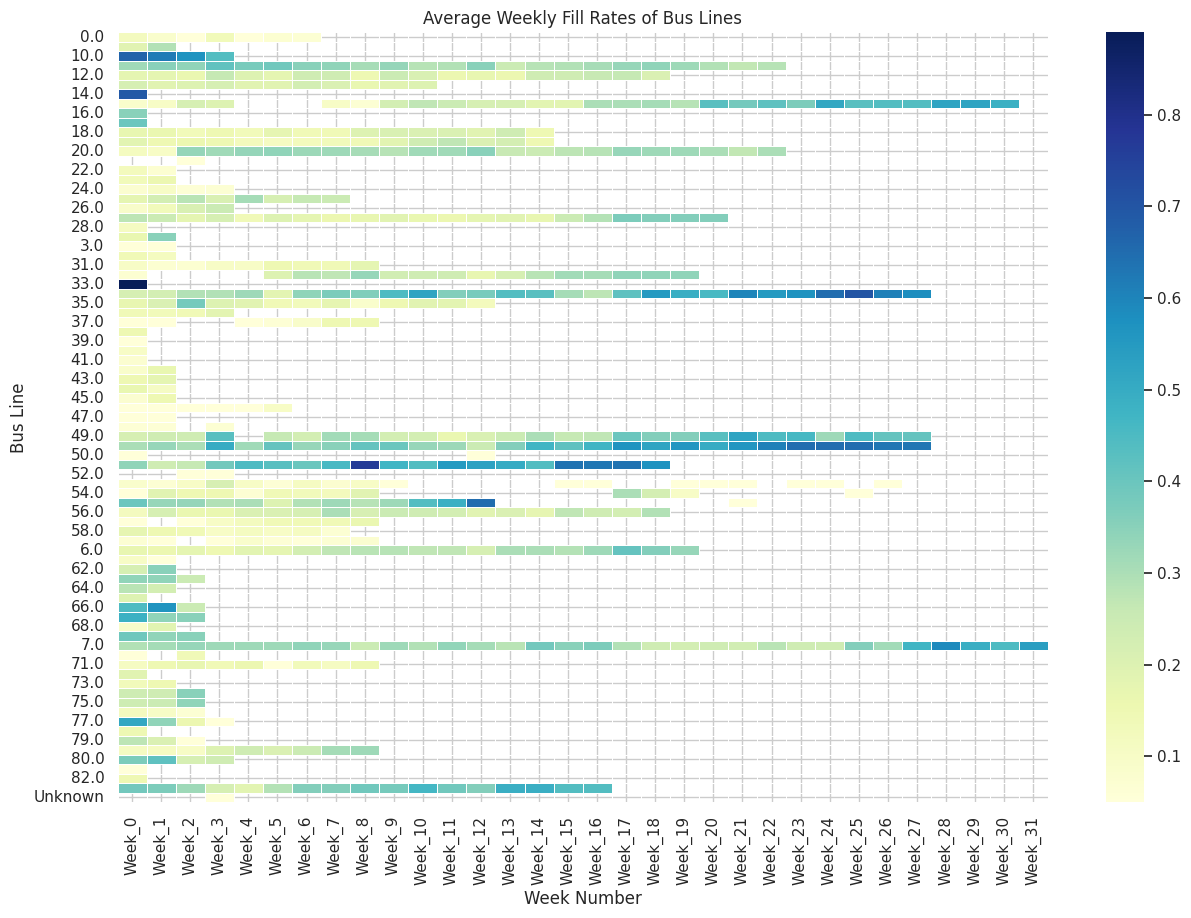

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(df_sql.set_index('busline_name'),  fmt=".2f", linewidths=.5, cmap="YlGnBu")

# Add labels and title
plt.ylabel('Bus Line')
plt.xlabel('Week Number')
plt.title('Average Weekly Fill Rates of Bus Lines')

# Show the plot
plt.show()

### 3. Conclusions and perspectives

Based on this insightful analysis, a conclusion could be:

"In conclusion, my analysis of Enakl's booking data revealed valuable insights into customer behavior and operational efficiency. We observed distinct patterns in booking and cancellation trends, which are crucial for optimizing our service offerings. The website appears to be unused which needs more attention to this situation.

The busline performance analysis highlighted specific lines that are performing well and others that require attention, particularly in achieving the desired fill rates.

Customer feedback and ratings provided actionable insights into areas where service improvements are needed.

Moving forward, it would be beneficial to focus on targeted marketing strategies to increase ridership on underperforming routes and to continue monitoring customer satisfaction to ensure high service quality. Additionally, exploring the potential of dynamic pricing or loyalty programs could further enhance user engagement and profitability."